In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_path = r"Titanic_train.csv"
test_path = r"Titanic_test.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [3]:
print("Train Dataset:\n", train_df.head())

Train Dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

In [4]:
print("\nTest Dataset:\n", test_df.head())


Test Dataset:
    PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [5]:
print("\nTrain Dataset Info:\n", train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Train Dataset Info:
 None


In [6]:
print("\nTest Dataset Info:\n", test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB

Test Dataset Info:
 None


In [7]:
print("\nMissing Values in Train Dataset:\n", train_df.isnull().sum())


Missing Values in Train Dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
print("\nMissing Values in Test Dataset:\n", test_df.isnull().sum())


Missing Values in Test Dataset:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


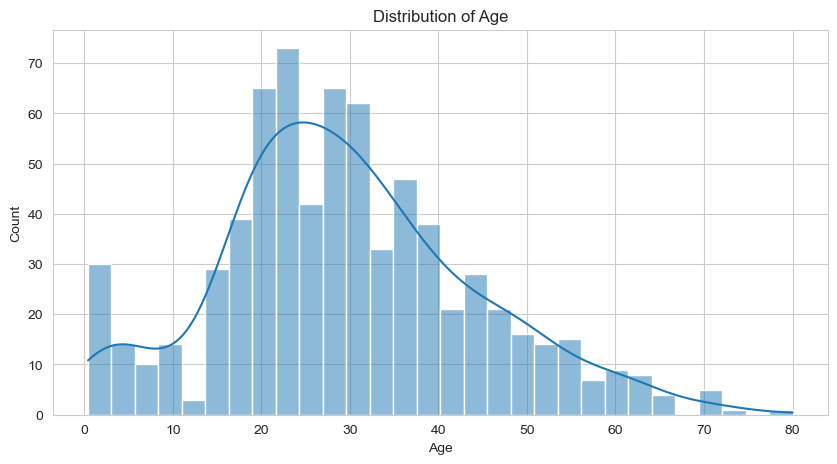

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(train_df["Age"].dropna(), bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\marri\AppData\Local\Temp\ipykernel_21648\1766162818.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=train_df, palette="coolwarm")


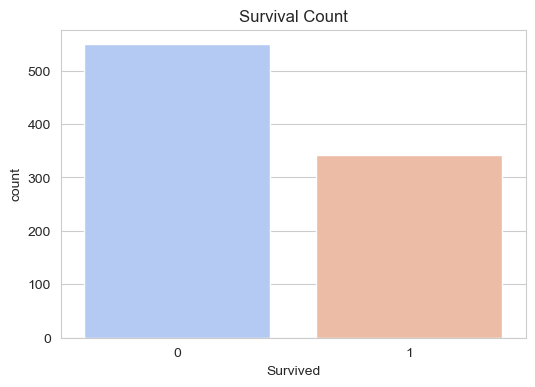

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=train_df, palette="coolwarm")
plt.title("Survival Count")
plt.show()

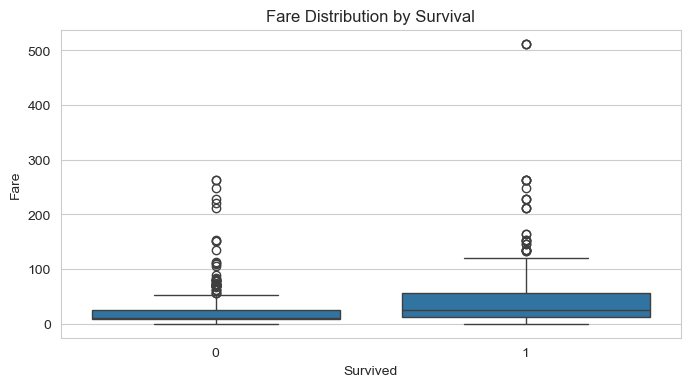

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Survived", y="Fare", data=train_df)
plt.title("Fare Distribution by Survival")
plt.show()

In [20]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)
train_df.drop(columns=["Cabin"], inplace=True)
test_df.drop(columns=["Cabin"], inplace=True)
train_df = pd.get_dummies(train_df, columns=["Sex", "Embarked"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Sex", "Embarked"], drop_first=True)
print("\nProcessed Train Dataset:\n", train_df.head())


Processed Train Dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500         1           0           1  
1          PC 17599  71.2833         0           0           0  
2  STON/O2. 3101282   7.9250         0           0           1  
3            113803  53.1000         0 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X = train_df.drop(columns=["Survived", "Name", "Ticket", "PassengerId"])
y = train_df["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)


Training Set Shape: (712, 8)
Validation Set Shape: (179, 8)


In [25]:
import lightgbm as lgb
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_val)
print("\n🔹 LightGBM Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_lgbm):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_lgbm):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_lgbm):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_lgbm):.4f}")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [27]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
print("\n XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred_xgb):.4f}")


 XGBoost Performance:
Accuracy: 0.8045
Precision: 0.7671
Recall: 0.7568
F1 Score: 0.7619


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:17:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


C:\Users\marri\AppData\Local\Temp\ipykernel_21648\3141341946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette="coolwarm")


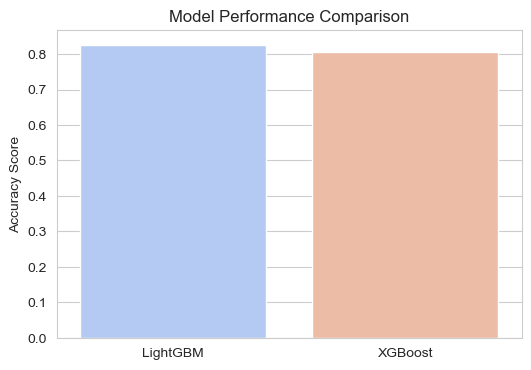

In [28]:
models = ["LightGBM", "XGBoost"]
accuracy_scores = [accuracy_score(y_val, y_pred_lgbm), accuracy_score(y_val, y_pred_xgb)]
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracy_scores, palette="coolwarm")
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy Score")
plt.show()